<a href="https://colab.research.google.com/github/merrymasti015/CAP2022GRP09/blob/main/PCAMZC321_Group09_FireEventDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fire event detection - Group 9 - 2020AIML Batch 
###Authors
-----------
###Vilas Govindankutty Menon 2020AIML509
###Vipin Chandran 2020AIML546
###Rajeshkumar Karuppaswamy 2020AIML502
###Abhilash Marripudi 2020AIML553

This scripts does the below steps:
1. Reads files and rearrange them into a processable folder for further image processing

 a.  it converts image to grey scale to help identifying dark and blurred images to help prevent them from being included when building the model as feature extraction will not work well on blurred or dark images

 b. Identifies fire and Neutral images and segregates them into different folders

2. Extract features using the VGG16 model and then build the fully connected layers to complete the model. The model is then used to predict if the images are "neutral" or "fire" images.
3. Based on the prediction we then write test into the image to complete the prediction process.

Next steps:
1. Building same logic into Video.
2. Building for streaming Video?? (TBD)

Prerequisites/Any Spacial Python Library used

Root folder:
/content/gdrive/MyDrive/Fire_ImageDataSet/



In [1]:
from google.colab import drive
from IPython import display
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


Input files location:


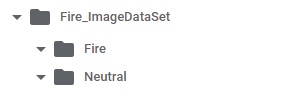

In [2]:
print('Input files location:')
display.Image("/content/gdrive/MyDrive/download_folder_1.jpg")

OutputFiles folders:


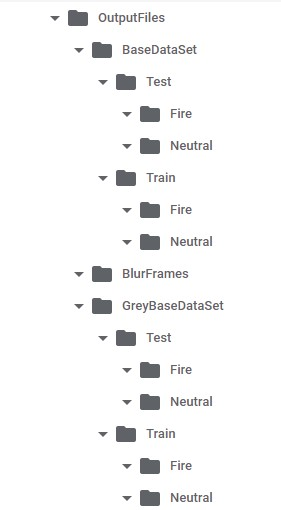

In [3]:
print('OutputFiles folders:')
display.Image("/content/gdrive/MyDrive/split_output_files_1.jpg")

In [4]:
import pandas as pd
print('pandas: {}'.format(pd.__version__))
import numpy as np
import numpy
print('numpy: {}'.format(np.__version__))
import cv2                                 # for capturing videos
print('cv2: {}'.format(cv2.__version__))

import os, os.path
from pathlib import Path
import math   # for mathematical operations


pandas: 1.3.5
numpy: 1.21.5
cv2: 4.1.2


In [5]:
!ls "/content/gdrive/MyDrive/Fire_ImageDataSet/Fire"

image_0.jpg    image_280.jpg  image_460.jpg  image_640.jpg  image_820.jpg
image_100.jpg  image_281.jpg  image_461.jpg  image_641.jpg  image_821.jpg
image_101.jpg  image_282.jpg  image_462.jpg  image_642.jpg  image_822.jpg
image_102.jpg  image_283.jpg  image_463.jpg  image_643.jpg  image_823.jpg
image_103.jpg  image_284.jpg  image_464.jpg  image_644.jpg  image_824.jpg
image_104.jpg  image_285.jpg  image_465.jpg  image_645.jpg  image_825.jpg
image_105.jpg  image_286.jpg  image_466.jpg  image_646.jpg  image_826.jpg
image_106.jpg  image_287.jpg  image_467.jpg  image_647.jpg  image_827.jpg
image_107.jpg  image_288.jpg  image_468.jpg  image_648.jpg  image_828.jpg
image_108.jpg  image_289.jpg  image_469.jpg  image_649.jpg  image_829.jpg
image_109.jpg  image_28.jpg   image_46.jpg   image_64.jpg   image_82.jpg
image_10.jpg   image_290.jpg  image_470.jpg  image_650.jpg  image_830.jpg
image_110.jpg  image_291.jpg  image_471.jpg  image_651.jpg  image_831.jpg
image_111.jpg  image_292.jpg  image_472

In [6]:
root_folder = "/content/gdrive/MyDrive/Fire_ImageDataSet/"
print(root_folder)

/content/gdrive/MyDrive/Fire_ImageDataSet/


In [7]:
ModelSave  = root_folder+"/ModelSave"
OutputFiles  = root_folder+"/OutputFiles"


   
if not os.path.exists(OutputFiles):
   os.makedirs(OutputFiles) 
if not os.path.exists(ModelSave):
   os.makedirs(ModelSave) 

print(ModelSave)
print(OutputFiles)

/content/gdrive/MyDrive/Fire_ImageDataSet//ModelSave
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles


In [8]:
os.listdir(root_folder) 

['Neutral', 'Fire', 'OutputFiles', 'ModelSave', 'VDO_fire']

In [9]:
sub_folders = [name for name in os.listdir(root_folder) if os.path.isdir(os.path.join(root_folder, name))]

print(sub_folders)

['Neutral', 'Fire', 'OutputFiles', 'ModelSave', 'VDO_fire']


In [10]:
for child in os.listdir(root_folder):
    if child == "ModelSave":
        continue
    if child == "OutputFiles":
        continue
        
    print(child)
   
    baseimagefolders = os.path.join(root_folder, child)
    if os.path.isdir(baseimagefolders):

        print(baseimagefolders)

Neutral
/content/gdrive/MyDrive/Fire_ImageDataSet/Neutral
Fire
/content/gdrive/MyDrive/Fire_ImageDataSet/Fire
VDO_fire
/content/gdrive/MyDrive/Fire_ImageDataSet/VDO_fire


In [11]:
image_path_list = []

valid_vdo_extensions = [".jpg", ".jpeg", ".png", ".tif", ".tiff"] #specify your vald extensions here #specify vald extensions here
valid_vdo_extensions = [item.lower() for item in valid_vdo_extensions]
     
#create a list all files in directory and
#append files with a vaild extention to image_path_list
for file in os.listdir(baseimagefolders):  ### extract each vdo from a given folder
    #print(file)
    extension = os.path.splitext(file)[1] ### How to extract only extension of a vdo file
    if extension.lower() not in valid_vdo_extensions:
        continue
            
    # image_path_list contains list of all vdo files with full path bame of a given vdo folder
    image_path_list.append(os.path.join(baseimagefolders, file))
image_path_list

[]

In [12]:
def img_Framing_Process(child, imageDir):
#------------------
 

    # Following 3 variables - for final csv 
    frame_filename = []
    frame_image    = []
    frame_class    = []
    
    
   
    #  valid extensions of base image
    image_path_list = []

    valid_extensions = [".jpg", ".jpeg", ".png", ".tif", ".tiff"] #specify your vald extensions here #specify vald extensions here
    valid_extensions = [item.lower() for item in valid_extensions]
     
    #create a list all files in directory and
    #append files with a vaild extention to image_path_list
    for file in os.listdir(imageDir):  ### extract each image from a given folder
        #print(file)
        extension = os.path.splitext(file)[1] ### How to extract only extension of a vdo file
        if extension.lower() not in valid_extensions:
            continue
        # image_path_list contains list of all vdo files with full path name of a given vdo folder
        image_path_list.append(os.path.join(imageDir, file))
    #print(image_path_list)
    
    #loop through image_path_list to open each image
    for Imagefile in image_path_list:       
              
        #image = cv2.imread(imagePath)
        FIlenameOnly = os.path.basename(Imagefile)
        #print("FIlenameOnly :" , FIlenameOnly)
        ## storing the images and their class in a dataframe
        frame_filename.append(FIlenameOnly)  # Only filename
        #temp = Path(Imagefile).stem # Find file name without extension
        #Outimage = os.path.join(OutimageDir+Imagefile)
        Outimage = Imagefile
        #print("Outimage :" , Outimage)
        frame_image.append(Outimage)         # File Name with complete path
        # creating the class of image        # Class i.e. 
        #print("child :" , child)
        frame_class.append(child)

    # storing the images and their class in a dataframe
    train_data = pd.DataFrame()
    train_data['FrameFilename'] = frame_filename
    train_data['FullPathName'] = frame_image
    train_data['class'] = frame_class
    
    # converting the dataframe into csv file 
    #train_data.to_csv('C:/GG-16-03/CAP4/HumanActivityRecognition/Dataset/VDO/train_new.csv',header=True, index=False)
    return train_data

In [13]:
# Main script that call vdo_Framing_Process 

count = 0
for child in os.listdir(root_folder):
    if child == "ModelSave":
        continue
    if child == "OutputFiles":
        continue


    count = count + 1
    baseimagefolders = os.path.join(root_folder, child)
    if os.path.isdir(baseimagefolders):
        print("Processing Folder :" , baseimagefolders)
        #outImage  = FramesVdo
        
        
        ### Calling vdo_Framing_Process function
        #df = img_Framing_Process(child , baseimagefolders,outImage)
        df = img_Framing_Process(child , baseimagefolders)
        print(count)
        if (count == 1):  ### First iteration - copy function used to create df2 for csv
            df2 = df.copy()
        else:
            df2 = pd.concat([df2 , df])  ### all other iteration concat function to append df2
            
print(df2.shape)

# converting the dataframe into csv file 
#df2.to_csv('C:/GG-16-03/CAP4/HumanActivityRecognition/Dataset/VDO/Final_2vdoframeFile.csv',header=True, index=False)
df2.to_csv(OutputFiles+'/step0_frameFile.csv',header=True, index=False)


Processing Folder : /content/gdrive/MyDrive/Fire_ImageDataSet/Neutral
1
Processing Folder : /content/gdrive/MyDrive/Fire_ImageDataSet/Fire
2
Processing Folder : /content/gdrive/MyDrive/Fire_ImageDataSet/VDO_fire
3
(2009, 3)


In [14]:
df2.head()

,FrameFilename,FullPathName,class
0,N_image_89.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Neut...,Neutral
1,N_image_886.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Neut...,Neutral
2,N_image_896.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Neut...,Neutral
3,N_image_96.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Neut...,Neutral
4,N_image_95.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Neut...,Neutral


In [15]:
df2['Train_Test'] = df2['FrameFilename'].str[:1]
df2.head()

,FrameFilename,FullPathName,class,Train_Test
0,N_image_89.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Neut...,Neutral,N
1,N_image_886.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Neut...,Neutral,N
2,N_image_896.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Neut...,Neutral,N
3,N_image_96.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Neut...,Neutral,N
4,N_image_95.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Neut...,Neutral,N


In [16]:
df2.tail()

,FrameFilename,FullPathName,class,Train_Test
995,TF_image_31.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Fire...,Fire,T
996,TF_image_27.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Fire...,Fire,T
997,TF_image_63.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Fire...,Fire,T
998,TF_image_11.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Fire...,Fire,T
999,TF_image_1.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Fire...,Fire,T


In [17]:
df2.to_csv(OutputFiles+'/step0_frameFile.csv',header=True, index=False)

In [18]:
#Count Unique Values of occupation
df2['Train_Test'].value_counts()

N    909
i    900
T    200
Name: Train_Test, dtype: int64

In [19]:
# filter df2 where Train_Test   column value is 'T' - for Test data set 
Filter_Value = ['T']
Test_Data = df2[df2['Train_Test'].isin(Filter_Value)]
print(Test_Data)

       FrameFilename                                       FullPathName  \
900  TN_image_83.jpg  /content/gdrive/MyDrive/Fire_ImageDataSet/Neut...   
901   TN_image_4.jpg  /content/gdrive/MyDrive/Fire_ImageDataSet/Neut...   
902  TN_image_40.jpg  /content/gdrive/MyDrive/Fire_ImageDataSet/Neut...   
903  TN_image_39.jpg  /content/gdrive/MyDrive/Fire_ImageDataSet/Neut...   
904  TN_image_99.jpg  /content/gdrive/MyDrive/Fire_ImageDataSet/Neut...   
..               ...                                                ...   
995  TF_image_31.jpg  /content/gdrive/MyDrive/Fire_ImageDataSet/Fire...   
996  TF_image_27.jpg  /content/gdrive/MyDrive/Fire_ImageDataSet/Fire...   
997  TF_image_63.jpg  /content/gdrive/MyDrive/Fire_ImageDataSet/Fire...   
998  TF_image_11.jpg  /content/gdrive/MyDrive/Fire_ImageDataSet/Fire...   
999   TF_image_1.jpg  /content/gdrive/MyDrive/Fire_ImageDataSet/Fire...   

       class Train_Test  
900  Neutral          T  
901  Neutral          T  
902  Neutral         

In [20]:
Test_Data.shape

(200, 4)

In [21]:
Test_Data.head()

,FrameFilename,FullPathName,class,Train_Test
900,TN_image_83.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Neut...,Neutral,T
901,TN_image_4.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Neut...,Neutral,T
902,TN_image_40.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Neut...,Neutral,T
903,TN_image_39.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Neut...,Neutral,T
904,TN_image_99.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Neut...,Neutral,T


In [22]:
testSetframelist = Test_Data["FrameFilename"].tolist()
testSetframelist

['TN_image_83.jpg',
 'TN_image_4.jpg',
 'TN_image_40.jpg',
 'TN_image_39.jpg',
 'TN_image_99.jpg',
 'TN_image_62.jpg',
 'TN_image_69.jpg',
 'TN_image_96.jpg',
 'TN_image_68.jpg',
 'TN_image_90.jpg',
 'TN_image_41.jpg',
 'TN_image_55.jpg',
 'TN_image_54.jpg',
 'TN_image_93.jpg',
 'TN_image_48.jpg',
 'TN_image_57.jpg',
 'TN_image_45.jpg',
 'TN_image_75.jpg',
 'TN_image_92.jpg',
 'TN_image_89.jpg',
 'TN_image_87.jpg',
 'TN_image_66.jpg',
 'TN_image_74.jpg',
 'TN_image_52.jpg',
 'TN_image_86.jpg',
 'TN_image_67.jpg',
 'TN_image_7.jpg',
 'TN_image_58.jpg',
 'TN_image_78.jpg',
 'TN_image_82.jpg',
 'TN_image_84.jpg',
 'TN_image_64.jpg',
 'TN_image_65.jpg',
 'TN_image_63.jpg',
 'TN_image_8.jpg',
 'TN_image_56.jpg',
 'TN_image_47.jpg',
 'TN_image_91.jpg',
 'TN_image_80.jpg',
 'TN_image_97.jpg',
 'TN_image_71.jpg',
 'TN_image_79.jpg',
 'TN_image_98.jpg',
 'TN_image_27.jpg',
 'TN_image_70.jpg',
 'TN_image_59.jpg',
 'TN_image_44.jpg',
 'TN_image_85.jpg',
 'TN_image_94.jpg',
 'TN_image_88.jpg',
 'T

In [23]:
# For train frame - all rows except (~) the test  list
Train_Data = df2[~df2['FrameFilename'].isin(testSetframelist)]

In [24]:
print(Train_Data)

       FrameFilename                                       FullPathName  \
0     N_image_89.jpg  /content/gdrive/MyDrive/Fire_ImageDataSet/Neut...   
1    N_image_886.jpg  /content/gdrive/MyDrive/Fire_ImageDataSet/Neut...   
2    N_image_896.jpg  /content/gdrive/MyDrive/Fire_ImageDataSet/Neut...   
3     N_image_96.jpg  /content/gdrive/MyDrive/Fire_ImageDataSet/Neut...   
4     N_image_95.jpg  /content/gdrive/MyDrive/Fire_ImageDataSet/Neut...   
..               ...                                                ...   
895    image_112.jpg  /content/gdrive/MyDrive/Fire_ImageDataSet/Fire...   
896    image_141.jpg  /content/gdrive/MyDrive/Fire_ImageDataSet/Fire...   
897    image_135.jpg  /content/gdrive/MyDrive/Fire_ImageDataSet/Fire...   
898    image_155.jpg  /content/gdrive/MyDrive/Fire_ImageDataSet/Fire...   
899    image_109.jpg  /content/gdrive/MyDrive/Fire_ImageDataSet/Fire...   

       class Train_Test  
0    Neutral          N  
1    Neutral          N  
2    Neutral         

In [25]:
# Drop column Train_Test from both Train_Data and Test_Data

# Remove column name 'Train_Test'
Train_Data = Train_Data.drop(['Train_Test'], axis = 1)
Test_Data = Test_Data.drop(['Train_Test'], axis = 1)

In [26]:
print(Train_Data.shape)
print(Test_Data.shape)

(1809, 3)
(200, 3)


In [27]:
###  Validate 

df2['Train_Test'].value_counts()

N    909
i    900
T    200
Name: Train_Test, dtype: int64

In [28]:
Train_Data.reset_index(drop=True)
Test_Data.reset_index(drop=True)

,FrameFilename,FullPathName,class
0,TN_image_83.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Neut...,Neutral
1,TN_image_4.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Neut...,Neutral
2,TN_image_40.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Neut...,Neutral
3,TN_image_39.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Neut...,Neutral
4,TN_image_99.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Neut...,Neutral
...,...,...,...
195,TF_image_31.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Fire...,Fire
196,TF_image_27.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Fire...,Fire
197,TF_image_63.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Fire...,Fire
198,TF_image_11.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Fire...,Fire


In [29]:
Train_Data.to_csv(OutputFiles+'/trainFrames.csv',header=True, index=False)
Test_Data.to_csv(OutputFiles+'/testFrames.csv',header=True, index=False)

In [30]:
print(root_folder)
print(OutputFiles)

/content/gdrive/MyDrive/Fire_ImageDataSet/
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles


In [31]:
## Read Train Data and Test data
Train_Data = pd.read_csv (OutputFiles + '/trainFrames.csv')
Test_Data  = pd.read_csv (OutputFiles + '/testFrames.csv')

In [32]:
#### Ignore Dark and Blur image for model training and test
BlurFrames  = OutputFiles+"/BlurFrames"
BaseDataSet  = OutputFiles+"/BaseDataSet"
Fire = BaseDataSet+"/Train"
TrainFire = Fire+"/Fire"
TrainNeutral = Fire+"/Neutral"

Neutral = BaseDataSet+"/Test"
TestFire = Neutral+"/Fire"
TesNeutral = Neutral+"/Neutral"



if not os.path.exists(BlurFrames):
   os.makedirs(BlurFrames) 
   
if not os.path.exists(BaseDataSet):
   os.makedirs(BaseDataSet) 

if not os.path.exists(Fire):
   os.makedirs(Fire) 

if not os.path.exists(TrainFire):
   os.makedirs(TrainFire) 

if not os.path.exists(TestFire):
   os.makedirs(TestFire) 

if not os.path.exists(Neutral):
   os.makedirs(Neutral) 

if not os.path.exists(TrainNeutral):
   os.makedirs(TrainNeutral) 

if not os.path.exists(TesNeutral):
   os.makedirs(TesNeutral) 



print(TrainFire)
print(TrainNeutral)

/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Train/Fire
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Train/Neutral


In [33]:
GreyBaseDataSet  = OutputFiles+"/GreyBaseDataSet"
GreyFire = GreyBaseDataSet+"/Train"
TrainGreyFire = GreyFire+"/Fire"
TrainGreyNeutral = GreyFire+"/Neutral"

GreyNeutral = GreyBaseDataSet+"/Test"
TestGreyFire = GreyNeutral+"/Fire"
TestGreyNeutral = GreyNeutral+"/Neutral"


if not os.path.exists(GreyBaseDataSet):
   os.makedirs(GreyBaseDataSet) 

if not os.path.exists(GreyFire):
   os.makedirs(GreyFire) 

if not os.path.exists(TrainGreyFire):
   os.makedirs(TrainGreyFire) 

if not os.path.exists(TestGreyFire):
   os.makedirs(TestGreyFire) 

if not os.path.exists(GreyNeutral):
   os.makedirs(GreyNeutral) 

if not os.path.exists(TrainGreyNeutral):
   os.makedirs(TrainGreyNeutral) 

if not os.path.exists(TestGreyNeutral):
   os.makedirs(TestGreyNeutral) 

In [34]:
print(TrainGreyFire)
print(TrainGreyNeutral)

/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/GreyBaseDataSet/Train/Fire
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/GreyBaseDataSet/Train/Neutral


## Function to identify BLURRED Images

In [35]:
def variance_of_laplacian(image):
    return cv2.Laplacian(image, cv2.CV_64F).var()
## Function return as value the average variance of the edges in an image. The higher the number, the sharper the edge is.

In [36]:
from tqdm import tqdm  #tqdm is a library in Python which is used for creating Progress Meters or Progress Bars.

In [37]:
Train_Data.shape

(1809, 3)

In [38]:
o=Train_Data['FullPathName'][0]
print(o)  

/content/gdrive/MyDrive/Fire_ImageDataSet/Neutral/N_image_89.jpg


## ## Image segregation for train  dataset &  code to identify Dark  Images 

In [39]:
kountg = 0
kount = 0
darkImagecount = 0
thvalue = 100  # In general, the threshold value gives very good results at 100.
# That differs from image to image, it depends on the camera you’re using and on the content of the pictures.


# Following variables - for final csv 
frame_filename = []
frameFile_Path    = []
GreyframeFile_Path = []
frame_class    = []
trainOrTest    = []


# for loop to read and store frames
for i in tqdm(range(Train_Data.shape[0])):
    # loading the image and keeping the target size as (224,224,3)
    # three-dimensional array containing the red, green, and blue pixel intensities. 
    #Image has been reformated to be 224-by-224 pixels in size.
    
    
    img = cv2.imread(Train_Data['FullPathName'][i])
    img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grey inage  
    
    if img is None:
        result = "Image is empty!!"
        print(result)
        print(Train_Data['FullPathName'][i])
        continue
        
    ## If image is dark - By pass 
    if np.average(img_grey) < 20:  ## if it dark image , skip 
        # skips an iteration, so the frame isn't saved
        result = "Dark Image!!"
        print(result)
        #print(Train_Data['FullPathName'][i])
        darkImagecount =  darkImagecount + 1
        continue


    fm = variance_of_laplacian(img_grey)  # Use grey image 
    #text = "Not Blurry"
    if fm < thvalue:
        kount = kount+1
        #text = "Blurry"
        #write to blurimage folder
        # Saving the image
        x= Train_Data['FullPathName'][i]
        #print(x)
        baseFileName = os.path.basename(x)
        #print(baseFileName)
        FinalPath= os.path.join(BlurFrames,baseFileName)
        #print(FinalPath)
        cv2.imwrite(FinalPath, img, [cv2.IMWRITE_JPEG_QUALITY, 50])
        continue 
    else:
        kountg = kountg+1
        # write to grey image folder
        # Saving the image
        x= Train_Data['FullPathName'][i]
        #print(x)
        baseFileName = os.path.basename(x)
        #print(baseFileName)
        
        #FinalPath= os.path.join(GreyFrames,"Grey"+baseFileName)
        ### Now split Fire and Neutral
        if Train_Data['class'][i] == "Fire":
            c_FinalPath= os.path.join(TrainFire,baseFileName)
            cv2.imwrite(c_FinalPath, img, [cv2.IMWRITE_JPEG_QUALITY, 50])
            
            
            FinalPath= os.path.join(TrainGreyFire,"Grey"+baseFileName)
            cv2.imwrite(FinalPath, img_grey, [cv2.IMWRITE_JPEG_QUALITY, 50])
            
            
        else:
            c_FinalPath= os.path.join(TrainNeutral,baseFileName)
            cv2.imwrite(c_FinalPath, img, [cv2.IMWRITE_JPEG_QUALITY, 50])
            FinalPath= os.path.join(TrainGreyNeutral,"Grey"+baseFileName)
            cv2.imwrite(FinalPath, img_grey, [cv2.IMWRITE_JPEG_QUALITY, 50])
            

            
        frame_filename.append(Train_Data['FrameFilename'][i])  # Only filename
        frameFile_Path.append(c_FinalPath)  # # File Name with complete path
           
        GreyframeFile_Path.append(FinalPath)  # # Grey File Frame Name with complete path
        frame_class.append(Train_Data['class'][i])  # # # Class i.e. Fire or Neutral
            
            
# storing the images and their class in a dataframe
FramePathLocation = pd.DataFrame()
FramePathLocation['FrameFilename'] = frame_filename
FramePathLocation['FullPathName'] = frameFile_Path
FramePathLocation['GreyFullPathName'] = GreyframeFile_Path
FramePathLocation['class'] = frame_class
          
            

print(kount)
print(kountg)
print(darkImagecount)

 58%|█████▊    | 1044/1809 [02:24<08:38,  1.47it/s]

Dark Image!!


 59%|█████▊    | 1059/1809 [02:34<08:10,  1.53it/s]

Dark Image!!


 61%|██████    | 1103/1809 [03:01<07:27,  1.58it/s]

Dark Image!!


 81%|████████  | 1462/1809 [06:33<03:09,  1.83it/s]

Dark Image!!


 89%|████████▉ | 1607/1809 [07:53<01:50,  1.83it/s]

Dark Image!!


 91%|█████████ | 1642/1809 [08:12<01:32,  1.81it/s]

Dark Image!!


 95%|█████████▍| 1713/1809 [08:53<01:01,  1.55it/s]

Dark Image!!


100%|██████████| 1809/1809 [09:45<00:00,  3.09it/s]

27
1775
7


In [40]:
FramePathLocation.head()

,FrameFilename,FullPathName,GreyFullPathName,class
0,N_image_89.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Neutral
1,N_image_886.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Neutral
2,N_image_896.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Neutral
3,N_image_96.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Neutral
4,N_image_95.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Neutral


In [41]:
FramePathLocation.shape

(1775, 4)

In [42]:
# converting the dataframe into csv file 

FramePathLocation.to_csv(OutputFiles+'/Train_FramePathLocation.csv',header=True, index=False)

In [43]:
Test_Data.shape

(200, 3)

In [44]:
o=Test_Data['FullPathName'][0]
print(o)  

/content/gdrive/MyDrive/Fire_ImageDataSet/Neutral/TN_image_83.jpg


## Image segregation for test dataset

In [45]:
kountg = 0
kount = 0
darkImagecount = 0
thvalue = 100  # In general, the threshold value gives very good results at 100.
# That differs from image to image, it depends on the camera you’re using and on the content of the pictures.


# Following variables - for final csv 
frame_filename = []
frameFile_Path    = []
GreyframeFile_Path = []
frame_class    = []
trainOrTest    = []


# for loop to read and store frames
for i in tqdm(range(Test_Data.shape[0])):
    # loading the image and keeping the target size as (224,224,3)
    # three-dimensional array containing the red, green, and blue pixel intensities. 
    #Image has been reformated to be 224-by-224 pixels in size.
    
    
    img = cv2.imread(Test_Data['FullPathName'][i])
    img_grey = cv2.cvtColor(img,  cv2.COLOR_BGR2GRAY)  # Convert to grey inage  
   
    
    if img is None:
        result = "Image is empty!!"
        print(result)
        print(Test_Data['FullPathName'][i])
        continue
        
    ## If image is dark - By pass 
    if np.average(img_grey) < 20:  ## if it dark image , skip 
        # skips an iteration, so the frame isn't saved
        result = "Dark Image!!"
        print(result)
        #print(Test_Data['FullPathName'][i])
        darkImagecount =  darkImagecount + 1
        continue


    fm = variance_of_laplacian(img_grey)  # Use grey image 
    #text = "Not Blurry"
    if fm < thvalue:
        kount = kount+1
        #text = "Blurry"
        #write to blurimage folder
        # Saving the image
        x= Test_Data['FullPathName'][i]
        #print(x)
        baseFileName = os.path.basename(x)
        #print(baseFileName)
        FinalPath= os.path.join(BlurFrames,baseFileName)
        #print(FinalPath)
        cv2.imwrite(FinalPath, img, [cv2.IMWRITE_JPEG_QUALITY, 50])
        continue 
    else:
        kountg = kountg+1
        # write to grey image folder
        # Saving the image
        x= Test_Data['FullPathName'][i]
        #print(x)
        baseFileName = os.path.basename(x)
        #print(baseFileName)
        
        #FinalPath= os.path.join(GreyFrames,"Grey"+baseFileName)

        ### Now split Fire and Neutral
        if Test_Data['class'][i] == "Fire":
            c_FinalPath= os.path.join(TestFire,baseFileName)
            cv2.imwrite(c_FinalPath, img, [cv2.IMWRITE_JPEG_QUALITY, 50])
            
            
            FinalPath= os.path.join(TestGreyFire,"Grey"+baseFileName)
            cv2.imwrite(FinalPath, img_grey, [cv2.IMWRITE_JPEG_QUALITY, 50])
            
            
        else:
            c_FinalPath= os.path.join(TesNeutral,baseFileName)
            cv2.imwrite(c_FinalPath, img, [cv2.IMWRITE_JPEG_QUALITY, 50])
            FinalPath= os.path.join(TestGreyNeutral,"Grey"+baseFileName)
            cv2.imwrite(FinalPath, img_grey, [cv2.IMWRITE_JPEG_QUALITY, 50])
            

            
        frame_filename.append(Test_Data['FrameFilename'][i])  # Only filename
        frameFile_Path.append(c_FinalPath)  # # File Name with complete path
           
        GreyframeFile_Path.append(FinalPath)  # # Grey File Frame Name with complete path
        frame_class.append(Test_Data['class'][i])  # # # Class i.e. Fire or Neutral
            
            
# storing the images and their class in a dataframe
FramePathLocation = pd.DataFrame()
FramePathLocation['FrameFilename'] = frame_filename
FramePathLocation['FullPathName'] = frameFile_Path
FramePathLocation['GreyFullPathName'] = GreyframeFile_Path
FramePathLocation['class'] = frame_class
          
            

print(kount)
print(kountg)
print(darkImagecount)

 12%|█▎        | 25/200 [00:01<00:13, 12.94it/s]

Dark Image!!


 27%|██▋       | 54/200 [00:03<00:08, 17.01it/s]

Dark Image!!


100%|██████████| 200/200 [01:02<00:00,  3.21it/s]

11
187
2


In [46]:
FramePathLocation.shape

(187, 4)

In [47]:
# converting the dataframe into csv file 

FramePathLocation.to_csv(OutputFiles+'/Test_FramePathLocation.csv',header=True, index=False)

# **Image visualizations**


This function helps to visualize images in test and train set in various categories Find image size (width, height)

Function to present the images

In [48]:
from PIL import Image             # Python Image Library 
import matplotlib.pyplot as plt   # Making plots 
import matplotlib.image as mpimg  # To view color image 
%matplotlib inline

In [49]:
TrainFire

'/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Train/Fire'

In [50]:
TrainNeutral

'/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Train/Neutral'

In [51]:
def image_collage(path, n_rows, n_cols, title,imageType):
    
    '''This function selects the first few images from given 
    path and presents in the collage form. 
    path is the directory from which images are taken. 
    n_rows and n_cols are rows and column of the collage. 
    title is the title of the collage.
    imageType - to indicate colur(C) or grey (G)'''
    
    # Initiating the plot 
    fig = plt.figure()
    plt.title(title)
    
    # Turns off axis from the collage (total plot)
    plt.axis('Off')
    
    # List of all images in the path
    img_list = os.listdir(path)

    img_num = 1
    for img in img_list[:n_rows*n_cols]:
        
        # directroies of the choosen images 
        img_path = os.path.join(path, img)
        
        # showing the color images 
        #img_read = mpimg.imread(img_path)
        img_read = mpimg.imread(img_path)
        
        if imageType == 'C':
            
           #Get image size (width, height) 
            h, w, c = img_read.shape
            print('Image:  ', img)
            print('width:  ', w)
            print('height: ', h)
            print('channel:', c)
        else:
            h, w  = img_read.shape
            print('Image:  ', img)
            print('width:  ', w)
            print('height: ', h)
            
            
            

        
        # collage is formed from subplot
        ax = fig.add_subplot(n_rows, n_cols, img_num)
        img_num += 1
        
        # displaying image in subplot 
        ax.imshow(img_read)
        
        # turns off the axis from individual image in the collage
        ax.axis('Off')

Image:   image_96.jpg
width:   300
height:  168
channel: 3
Image:   image_92.jpg
width:   310
height:  163
channel: 3
Image:   image_894.jpg
width:   282
height:  178
channel: 3
Image:   image_893.jpg
width:   299
height:  168
channel: 3
Image:   image_93.jpg
width:   291
height:  173
channel: 3
Image:   image_876.jpg
width:   293
height:  172
channel: 3
Image:   image_898.jpg
width:   266
height:  189
channel: 3
Image:   image_888.jpg
width:   300
height:  168
channel: 3
Image:   image_89.jpg
width:   292
height:  173
channel: 3
Image:   image_895.jpg
width:   300
height:  168
channel: 3
Image:   image_807.jpg
width:   275
height:  183
channel: 3
Image:   image_838.jpg
width:   258
height:  195
channel: 3
Image:   N_image_89.jpg
width:   300
height:  168
channel: 3
Image:   N_image_886.jpg
width:   800
height:  600
channel: 3
Image:   N_image_896.jpg
width:   800
height:  600
channel: 3
Image:   N_image_96.jpg
width:   258
height:  195
channel: 3
Image:   N_image_95.jpg
width:   252
h

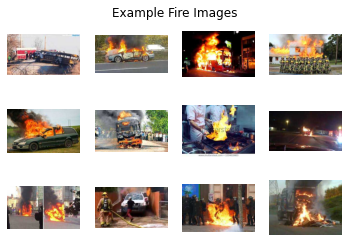

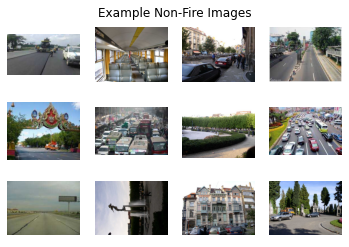

In [52]:
ImageType = 'C' # Colour image
image_collage(TrainFire, 3, 4, 'Example Fire Images' , ImageType)
image_collage(TrainNeutral, 3, 4, 'Example Non-Fire Images',ImageType)

In [53]:
TrainGreyFire

'/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/GreyBaseDataSet/Train/Fire'

In [54]:
TrainGreyNeutral

'/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/GreyBaseDataSet/Train/Neutral'

In [55]:
ImageType = 'G' # Gray image

Image:   Greyimage_96.jpg
width:   300
height:  168
Image:   Greyimage_92.jpg
width:   310
height:  163
Image:   Greyimage_894.jpg
width:   282
height:  178
Image:   Greyimage_893.jpg
width:   299
height:  168
Image:   Greyimage_93.jpg
width:   291
height:  173
Image:   Greyimage_876.jpg
width:   293
height:  172
Image:   Greyimage_898.jpg
width:   266
height:  189
Image:   Greyimage_888.jpg
width:   300
height:  168
Image:   Greyimage_89.jpg
width:   292
height:  173
Image:   Greyimage_895.jpg
width:   300
height:  168
Image:   Greyimage_807.jpg
width:   275
height:  183
Image:   Greyimage_838.jpg
width:   258
height:  195
Image:   GreyN_image_89.jpg
width:   300
height:  168
Image:   GreyN_image_886.jpg
width:   800
height:  600
Image:   GreyN_image_896.jpg
width:   800
height:  600
Image:   GreyN_image_96.jpg
width:   258
height:  195
Image:   GreyN_image_95.jpg
width:   252
height:  200
Image:   GreyN_image_90.jpg
width:   275
height:  183
Image:   GreyN_image_890.jpg
width:   800


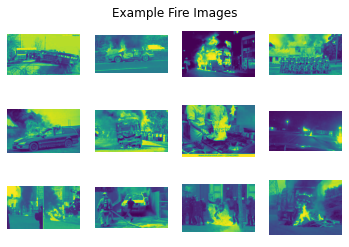

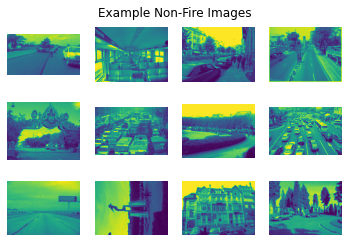

In [56]:
image_collage(TrainGreyFire, 3, 4, 'Example Fire Images',ImageType)
image_collage(TrainGreyNeutral, 3, 4, 'Example Non-Fire Images',ImageType )

## Model Check point: Save the model

Now that we have created the target directories and segregated the test and train and all the folders lets start from this point so that we do not need to go back to the prep part again

# Training the Classification Model using VGG16 on ImageNet

#### VGG16is a type of CNN (Convolutional Neural Network) that is considered to be one of the best computer vision models to date. 

#### ### VGG16  - This pre-trained models can be used for image classification, feature extraction, and transfer learning.

#### Main focus is feature extraction, not for image classification.

### https://franky07724-57962.medium.com/using-keras-pre-trained-models-for-feature-extraction-in-image-clustering-a142c6cdf5b1

### VGG16 takes input tensor size as 224, 244 with 3 RGB channel

In [57]:
import pandas as pd
print('pandas: {}'.format(pd.__version__))
import numpy as np
import numpy
print('numpy: {}'.format(np.__version__))
import cv2                                 # for capturing videos
print('cv2: {}'.format(cv2.__version__))

import os, os.path
from pathlib import Path
import math   # for mathematical operations

pandas: 1.3.5
numpy: 1.21.5
cv2: 4.1.2


In [58]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_folder = "/content/gdrive/MyDrive/Fire_ImageDataSet/"
ModelSave  = root_folder+"/ModelSave"
OutputFiles  = root_folder+"/OutputFiles"


Mounted at /content/gdrive


In [59]:
import keras
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from keras.preprocessing import image
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split

import pickle

import time

import seaborn as sns

In [60]:
print(ModelSave)
print(OutputFiles)

/content/gdrive/MyDrive/Fire_ImageDataSet//ModelSave
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles


In [61]:
trainFrames  = pd.read_csv(OutputFiles+"/trainFrames.csv")

In [62]:
trainFrames.head()

,FrameFilename,FullPathName,class
0,N_image_89.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Neut...,Neutral
1,N_image_886.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Neut...,Neutral
2,N_image_896.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Neut...,Neutral
3,N_image_96.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Neut...,Neutral
4,N_image_95.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet/Neut...,Neutral


In [63]:
trainFrames.shape

(1809, 3)

In [64]:
#Count Unique Values of occupation
trainFrames['class'].value_counts()

Neutral    909
Fire       900
Name: class, dtype: int64

In [65]:
#Check the distribution of a Column in terms of %
def Column_Distribution(df, column):
   
    label_distrb = 100*df.groupby(column).agg({column: "count"})/len(df)
    label_distrb.columns = ['Distribution %'] 
    return label_distrb

## Class Distribution : Train

         Distribution %
class                  
Fire          49.751244
Neutral       50.248756


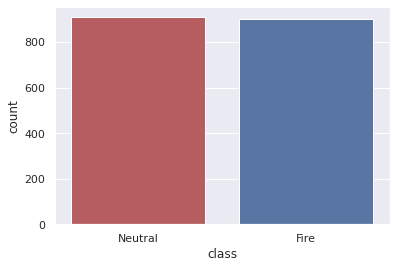

In [66]:
#Find % of class
#Calling Column_Distribution function to check the % of Label distribution
class_distrb =Column_Distribution(trainFrames,'class')
print(class_distrb)


sns.set()

sns.countplot(x ="class", data=trainFrames, palette=['r','b']);

In [67]:
# Get the unique values of 'class' column - How many distinct classes
model_class = trainFrames['class'].unique().tolist()
print(model_class)
model_output_size = len(model_class)
print(model_output_size)

['Neutral', 'Fire']
2


In [68]:
trainFrames.shape[0]

1809

In [69]:
trainFrames['FullPathName'][0]

'/content/gdrive/MyDrive/Fire_ImageDataSet/Neutral/N_image_89.jpg'

In [70]:
from glob import glob
from scipy import stats as s

In [71]:
train_image = []

# for loop to read and store frames
for i in tqdm(range(trainFrames.shape[0])):
    # loading the image and keeping the target size as (224,224,3)
    # three-dimensional array containing the red, green, and blue pixel intensities. 
    #Image has been reformated to be 224-by-224 pixels in size.
    img = image.load_img(trainFrames['FullPathName'][i], target_size=(224,224,3))
    #print(img.shape)
    # converting it to array
    img = image.img_to_array(img)
    
    # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
    img = img/255
    # appending the image to the train_image list
    train_image.append(img)
    
# converting the list to numpy array
X = np.array(train_image)

# shape of the array
X.shape

100%|██████████| 1809/1809 [00:08<00:00, 213.11it/s]


(1809, 224, 224, 3)

In [72]:
# make sure that the distribution of each class is similar in both training and validation sets. 
# We can use the stratify parameter to ensure that the distribution of data is same as the strata of the data

# separating the targetcate
y = trainFrames['class']

# creating the training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify = y)

In [73]:
print(X_train.shape)
print(X_test.shape)

(1447, 224, 224, 3)
(362, 224, 224, 3)


In [74]:
# creating dummies of target variable for train and validation set
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

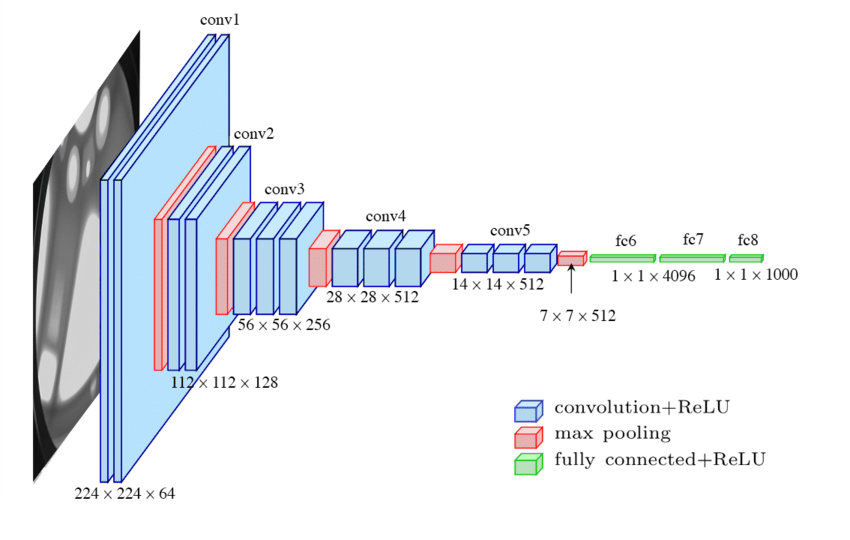

In [75]:
from IPython import display
display.Image("/content/gdrive/MyDrive/VGG-16-network-architecture.png")

**Keras provides a set of state-of-the-art deep learning models along with pre-trained weights on ImageNet. These pre-trained models can be used for image classification, feature extraction, and transfer learning, VGG16 refers to a VGG model with 16 weight layers, and VGG19 refers to a VGG model with 19 weight layers.**
<br><br>
1. The input layer takes an image in the size of (224 x 224 x 3), and the output layer is a softmax prediction on classes.

2. From the input layer to the last max pooling layer (labeled by 7 x 7 x 512) is regarded as the feature extraction part of the model,

3. Rest of the network is regarded as the classification part of the model. 


VGG-16 pre-trained model will be used
https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/

**creating the base model of pre-trained VGG16 model
When loading a given model, If we set “include_top” = False, that means the fully-connected output layers of the model used to make predictions is not loaded, allowing a new output layer to be added and trained.**

In [76]:

# creating the base model of pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)

### set include_top = False it overlooks the last 3 Fully Connected(FC) layers 

58900480/58889256 [==============================] - 1s 0us/step


In [77]:
%%time
# extracting features for training frames
X_train = base_model.predict(X_train)
X_train.shape

CPU times: user 12.2 s, sys: 1.47 s, total: 13.7 s
Wall time: 19.9 s


In [78]:
%%time
# extracting features for validation frames
X_test = base_model.predict(X_test)
X_test.shape

CPU times: user 3.02 s, sys: 110 ms, total: 3.13 s
Wall time: 3.04 s


In [79]:
print(X_train.shape[0])
print(X_test.shape[0])
      

1447
362


*There are 362 images in the test set and the shape of these images has also changed to (7, 7, 512). We will use a fully connected network now to fine-tune the model. This fully connected network takes input in single dimension. So, we will reshape the images into a single dimension:

**Whole network (for classification) can be divided into two parts:**

Feature extraction: In the conventional classification algorithms, like SVMs, we used to extract features from the data to make the classification work. The convolutional layers are serving the same purpose of feature extraction. CNNs capture better representation of data and hence we don’t need to do feature engineering.

Classification: After feature extraction we need to classify the data into various classes, this can be done using a fully connected (FC) neural network. In place of fully connected layers, we can also use a conventional classifier like SVM. But we generally end up adding FC layers to make the model end-to-end trainable.

Fully-connected layer is also a linear classifier such as logistic regression

Convolution and pooling layers extract features from image. So this layer doing some "preprocessing" of data. Fully connected layrs perform classification based on this extracted features.*

In [80]:
X_train = X_train.reshape(X_train.shape[0], 7*7*512)
X_test = X_test.reshape(X_test.shape[0], 7*7*512)

In [81]:
# normalize the pixel values, i.e., keep the pixel values between 0 and 1. This helps the model to converge faster.
X_train.max()

11.058349

In [82]:
max = X_train.max()
X_train = X_train/max
X_test = X_test/max

In [83]:
# shape of images
X_train.shape

(1447, 25088)

# Keras Neural Network Sequential Model
More Info - https://faroit.com/keras-docs/1.0.1/getting-started/sequential-model-guide/

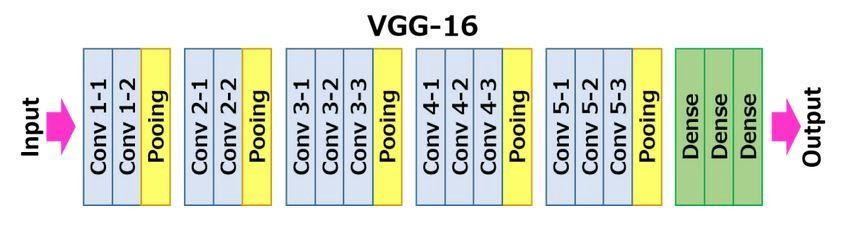

In [84]:
from IPython import display
display.Image("/content/gdrive/MyDrive/VGG16_Layers.jpg")

**The 16 in VGG16 refers to 16 layers that have weights. In VGG16 there are thirteen convolutional layers, five Max Pooling layers, and three Dense layers which sum up to 21 layers but it has only sixteen weight layers i.e., learnable parameters layer.**

In [85]:
#defining the model architecture
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(25088,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(model_output_size, activation='softmax'))  # model_output_size is 2 - already defined

1 x Dense layer of 1024 units

1 x Dense layer of 512 units

1 x Dense layer of 256 units

1 x Dense layer of 128 units

RELU activation for first four dense layers of units to stop forwarding negative values through the network.

2 unit dense layer in the end with softmax activation as there are 2 classes (model_output_size) to predict from in the end which are Basketball and SoccerPenalty.

The softmax layer will output the value between 0 and 1 based on the confidence of the model that which class the images belongs to.
Dropout

Usually, dropout is placed on the fully connected layers only because they are the one with the greater number of parameters and thus they're likely to excessively co-adapting themselves causing overfitting. However, since it's a stochastic regularization technique, you can really place it everywhere
Dropout here has been applied applied to hidden neurons in the body of network model.

a dropout rate of 50% is used

In [86]:
# Printing the models summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3

**ModelCheckpoint callback** is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.

**save_best_only**: if save_best_only=True, it only saves when the model is considered the "best" and the latest best model according to the quantity monitored will not be overwritten
The metric name to monitormode: one of {'auto', 'min', 'max'}. If **save_best_only=True**, the decision to overwrite the current save file is made based on either the maximization or the minimization of the monitored quantity. For val_acc, this should be max, for val_loss this should be min
mode: one of {'auto', 'min', 'max'}. If save_best_only=True, -- **the decision to overwrite the current save file is made based on either the maximization or the minimization of the monitored quantity**. For val_acc, this should be max, for val_loss this should be min

In [87]:
###Training the classification model

# defining a function to save the weights of best model
### from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

mcp_save = ModelCheckpoint('weight.hdf5', save_best_only=True, monitor='val_loss', mode='min')

#### Compile Model using  Adam optimiser 

In [88]:
# compiling the model - Adding loss, optimizer and metrics values to the model.
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [89]:
%%time
# training the model
#model_training_history = model.fit( X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[mcp_save], batch_size=128)

# Adding Early Stopping Callback
#early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)

model_training_history = model.fit(x = X_train, y = y_train, epochs = 30, batch_size = 4 , shuffle = True, validation_split = 0.2, callbacks=[mcp_save])

Epoch 1/30
290/290 [==============================] - 4s 10ms/step - loss: 0.7142 - accuracy: 0.7096 - val_loss: 0.2049 - val_accuracy: 0.9103
Epoch 2/30
290/290 [==============================] - 3s 10ms/step - loss: 0.2959 - accuracy: 0.8825 - val_loss: 0.1992 - val_accuracy: 0.9034
Epoch 3/30
290/290 [==============================] - 3s 10ms/step - loss: 0.2088 - accuracy: 0.9352 - val_loss: 0.1973 - val_accuracy: 0.8966
Epoch 4/30
290/290 [==============================] - 3s 10ms/step - loss: 0.1480 - accuracy: 0.9602 - val_loss: 0.1646 - val_accuracy: 0.9379
Epoch 5/30
290/290 [==============================] - 3s 10ms/step - loss: 0.1362 - accuracy: 0.9602 - val_loss: 0.1423 - val_accuracy: 0.9345
Epoch 6/30
290/290 [==============================] - 2s 8ms/step - loss: 0.0919 - accuracy: 0.9723 - val_loss: 0.1567 - val_accuracy: 0.9483
Epoch 7/30
290/290 [==============================] - 3s 10ms/step - loss: 0.0971 - accuracy: 0.9697 - val_loss: 0.1336 - val_accuracy: 0.9552


### Evaluate trained model on the feature’s and label’s test(validation) sets.

In [90]:
model_evaluation_history = model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 3ms/step - loss: 0.2791 - accuracy: 0.9586


In [91]:
preds=np.round(model.predict(X_test,0))

In [92]:
from sklearn.metrics import classification_report

In [93]:
classification_metrics = classification_report(y_test,preds, target_names = model_class)
print(classification_metrics)

              precision    recall  f1-score   support

     Neutral       0.97      0.95      0.96       180
        Fire       0.95      0.97      0.96       182

   micro avg       0.96      0.96      0.96       362
   macro avg       0.96      0.96      0.96       362
weighted avg       0.96      0.96      0.96       362
 samples avg       0.96      0.96      0.96       362



In [94]:
def plot_metric(metric_name_1, metric_name_2, plot_name):
  # Get Metric values using metric names as identifiers
  metric_value_1 = model_training_history.history[metric_name_1]
  metric_value_2 = model_training_history.history[metric_name_2]

  # Constructing a range object which will be used as time 
  epochs = range(len(metric_value_1))
  
  # Plotting the Graph
  plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
  plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)
  
  # Adding title to the plot
  plt.title(str(plot_name))

  # Adding legend to the plot
  plt.legend()

### **Plot total loss vs val loss**


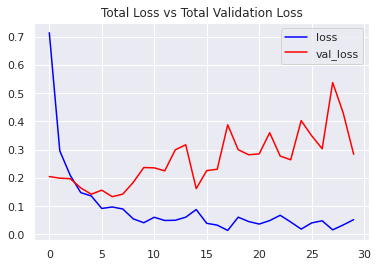

In [95]:
plot_metric('loss', 'val_loss', 'Total Loss vs Total Validation Loss')

### **Plot total accuracy vs val accuracy**

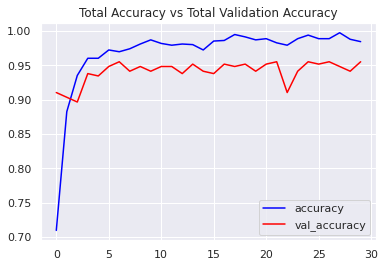

In [96]:
plot_metric('accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

In [97]:
### Save model in a folder 
ModelSave

'/content/gdrive/MyDrive/Fire_ImageDataSet//ModelSave'

In [98]:
# Saving Model
model_name = 'Step-1_VGG_model.h5'
model.save(ModelSave+'/'+model_name)

### How to load the model from disk

In [99]:
OutputFiles


'/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles'

In [100]:
model_name = 'Step-1_VGG_model.h5'

In [101]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_folder = "/content/gdrive/MyDrive/Fire_ImageDataSet/"
ModelSave  = root_folder+"/ModelSave"
OutputFiles  = root_folder+"/OutputFiles"

Mounted at /content/gdrive


In [102]:
from tensorflow import keras

model = keras.models.load_model(ModelSave+'/'+model_name)


In [103]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
from tqdm import tqdm
from keras.applications.vgg16 import VGG16
import cv2
import math
import os
from glob import glob
from scipy import stats as s
import seaborn as sns

## Use the model to predict given test images

In [104]:
# read testFrames csv
testFrames  = pd.read_csv(OutputFiles+"/Test_FramePathLocation.csv")
#testFrames  = pd.read_csv(OutputFiles+"/HW_FramePathLocation.csv") # testing homework from Gautam sir
testFrames.shape

(187, 4)

In [105]:
testFrames.head()

,FrameFilename,FullPathName,GreyFullPathName,class
0,TN_image_4.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Neutral
1,TN_image_40.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Neutral
2,TN_image_39.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Neutral
3,TN_image_99.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Neutral
4,TN_image_62.jpg,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Neutral


In [106]:
#Count Unique Values of occupation
testFrames['class'].value_counts()

Fire       97
Neutral    90
Name: class, dtype: int64

In [107]:
#Check the distribution of a Column in terms of %
def Column_Distribution(df, column):
   
    label_distrb = 100*df.groupby(column).agg({column: "count"})/len(df)
    label_distrb.columns = ['Distribution %'] 
    return label_distrb

## Test Distribution

         Distribution %
class                  
Fire          51.871658
Neutral       48.128342


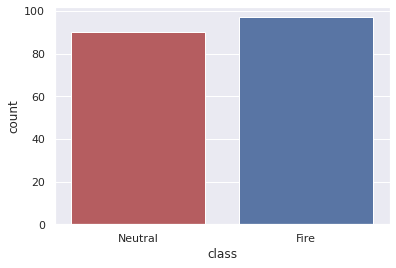

In [108]:
#Find % of class
#Calling Column_Distribution function to check the % of Label distribution
class_distrb =Column_Distribution(testFrames,'class')
print(class_distrb)


sns.set()

sns.countplot(x ="class", data=testFrames, palette=['r','b']);

In [109]:
# Extract each frame from testFrames 
testSetFramelist = testFrames["FrameFilename"].tolist()

In [110]:
print(len(testSetFramelist))

# Remove Duplicates From  list - 
testSetFramelist = list(dict.fromkeys(testSetFramelist))
print(len(testSetFramelist))

187
187


In [111]:
# separating the target class into its own variable
# To map the predicted categories with the actual categories, we will use train frame class:
y = trainFrames['class']
y = pd.get_dummies(y)

In [112]:
print(y)

      Fire  Neutral
0        0        1
1        0        1
2        0        1
3        0        1
4        0        1
...    ...      ...
1804     1        0
1805     1        0
1806     1        0
1807     1        0
1808     1        0

[1809 rows x 2 columns]


In [113]:
y.columns.values[0]

'Fire'

In [114]:
from scipy import stats as s

# Do the Prediction (Run Model to predict Test Images)

In [115]:
# loop through test dataset to read and store test frames
# creating two lists to store predicted and actual tags
predict = [] # list to store the model class predictions
ProbM = [] # list to store probability of the prediction being correct for each image 
actual = [] # store actual images 
indent_variable = [] # store file names for each image to help compare using the same index as that used for actual and predict classes

for i in range(len(testSetFramelist)):
    
    temp_df = testFrames.loc[(testFrames.FrameFilename == testSetFramelist[i])] 
    temp_df = temp_df.reset_index(drop=True)  # reset index
    #print(temp_df.shape)  
   
    prediction_images = []
    
    # appending the actual class of the video
    
    actual.append(temp_df['class'][0])
    #print("Actual:" , actual)

    # appending the file name as indent
    indent_variable.append(temp_df['FullPathName'][0])
    #print("Indent:" ,indent_variable)

    for i in tqdm(range(temp_df.shape[0])):  ### Loop through all frames
        
 
        # loading the image and keeping the target size as (224,224,3)
        img = image.load_img(temp_df['FullPathName'][i], target_size=(224,224,3))
        # converting it to array
        img = image.img_to_array(img)
        # normalizing the pixel value
        img = img/255
        # appending the image to the image list
        prediction_images.append(img)
        #print("Prediction:" , prediction_images)
        
    # converting the list to numpy array
    prediction_images = np.array(prediction_images)

    # extracting features using pre-trained model
    prediction_images = base_model.predict(prediction_images)

    # converting features in one dimensional array
    prediction_images = prediction_images.reshape(prediction_images.shape[0], 7*7*512)

    # predicting class for each array
    ########## Changes done as predict_proba and predict_classes are depricated ##########
    predict_x=model.predict(prediction_images) 
    prediction=np.argmax(predict_x,axis=1)
    #prediction = model.predict_classes(prediction_images)

    #print (prediction)
    
    print (y.columns.values[prediction[0]]) # Convert to text i.e Fire and Neutrl 
    #print (prediction[0][0])
    
    #print("Prediction:" , prediction)
    # appending the mode of predictions 
    predict.append(y.columns.values[prediction[0]])

    # predicting Max Probability  for each image
    ########## Changes done as predict_proba and predict_classes are depricated ##########
    arr = model.predict(prediction_images)
    #print (arr)
    prob = np.max(arr)
    
    
    # appending Max Probability for each image  
    ProbM.append(prob)



100%|██████████| 1/1 [00:00<00:00, 91.75it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 71.70it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 104.77it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 116.40it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 101.07it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 103.57it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 85.87it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 98.49it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 101.91it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 75.44it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 104.24it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 106.50it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 103.39it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 99.23it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 91.76it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 99.68it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 87.11it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 109.00it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 95.50it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 92.12it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 114.76it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 91.32it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 89.97it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 88.47it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 95.68it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 86.01it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 106.39it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 94.33it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 108.70it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 85.47it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 93.22it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 83.88it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 102.76it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 78.19it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 113.54it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 94.81it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 104.94it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 88.58it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 98.84it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 66.36it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 113.52it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 89.95it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 112.55it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 81.52it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 106.72it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 102.04it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 103.69it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 82.47it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 93.39it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 104.48it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 99.65it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 102.12it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 83.94it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 106.36it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 102.04it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 90.94it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 82.41it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 118.96it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 88.59it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 89.97it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 85.66it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 102.09it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 96.76it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 80.39it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 109.56it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 104.35it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 101.65it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 94.06it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 105.25it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 95.13it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 88.49it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 98.50it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 94.06it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 101.29it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 99.34it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 89.85it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 86.04it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 81.84it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 93.78it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 87.09it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 100.42it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 93.38it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 113.67it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 98.28it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 105.20it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 97.69it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 78.33it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 89.12it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 95.00it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 170.18it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 181.41it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 285.37it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 202.08it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 231.49it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 234.52it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 257.40it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 167.69it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 213.14it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 180.01it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 217.48it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 150.22it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 292.82it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 201.98it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 197.98it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 198.38it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 190.92it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 238.14it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 193.60it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 190.79it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 252.53it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 201.60it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 158.53it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 225.35it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 207.39it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 247.54it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 276.41it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 179.55it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 186.54it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 294.23it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 289.38it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 239.32it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 207.67it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 244.77it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 165.20it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 219.36it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 164.03it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 237.72it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 206.41it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 200.71it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 246.33it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 199.39it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 283.84it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 215.76it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 147.68it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 345.95it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 199.87it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 262.69it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 158.32it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 226.56it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 208.26it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 243.61it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 197.77it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 243.73it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 172.75it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 164.55it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 229.05it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 188.31it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 190.43it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 188.53it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 224.10it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 256.06it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 154.69it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 153.36it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 199.38it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 205.45it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 255.61it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 247.86it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 181.27it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 220.35it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 188.81it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 260.82it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 193.72it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 214.60it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 181.71it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 205.39it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 262.74it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 237.14it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 143.12it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 180.51it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 269.63it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 307.84it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 232.73it/s]


Neutral


100%|██████████| 1/1 [00:00<00:00, 227.57it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 222.91it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 187.73it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 195.26it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 186.31it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 240.42it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 187.30it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 162.90it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 185.55it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 182.69it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 194.28it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 164.70it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 209.30it/s]


Fire


100%|██████████| 1/1 [00:00<00:00, 164.28it/s]


Neutral


In [116]:
prediction

array([1])

In [117]:
# Calling DataFrame constructor iterate through the lists using same index, to build dataframe with the prediction
# both lists, with columns specified
EvalFinalOutput = pd.DataFrame(list(zip(indent_variable, actual ,predict , ProbM )),
               columns =['FrameFileName', 'ActualClass' , 'PredictedClass', 'Max_Probability'])

def get_is_prediction_correct(df_row):
  if df_row['ActualClass'] == df_row['PredictedClass']:
    return True
  else:
    return False

EvalFinalOutput['Is_correct_prediction'] = EvalFinalOutput.apply(get_is_prediction_correct,axis=1)

EvalFinalOutput

,FrameFileName,ActualClass,PredictedClass,Max_Probability,Is_correct_prediction
0,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Neutral,Neutral,1.0,True
1,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Neutral,Neutral,1.0,True
2,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Neutral,Neutral,1.0,True
3,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Neutral,Neutral,1.0,True
4,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Neutral,Neutral,1.0,True
...,...,...,...,...,...
182,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Fire,Fire,1.0,True
183,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Fire,Fire,1.0,True
184,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Fire,Fire,1.0,True
185,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Fire,Fire,1.0,True


In [118]:
# save final predictions dataset to CSV for a checkpoint
EvalFinalOutput.to_csv(OutputFiles+'/EvalFinalVGGOutput.csv',header=True, index=False)
#EvalFinalOutput.to_csv(OutputFiles+'/EvalFinalVGGOutput_HW.csv',header=True, index=False)

Below sample Images for Correct Predictaion


  0%|          | 0/187 [00:00<?, ?it/s]

Correct Prediction
prediction: Neutral


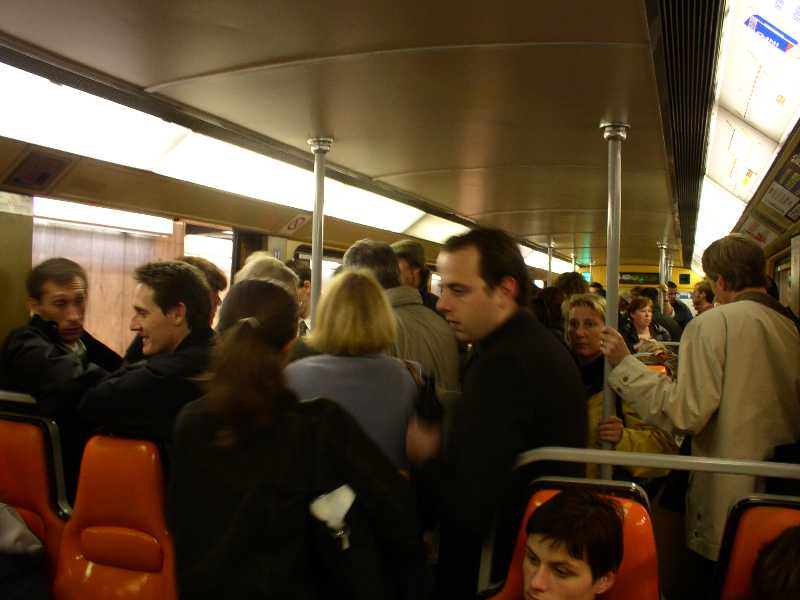

Correct Prediction
prediction: Neutral


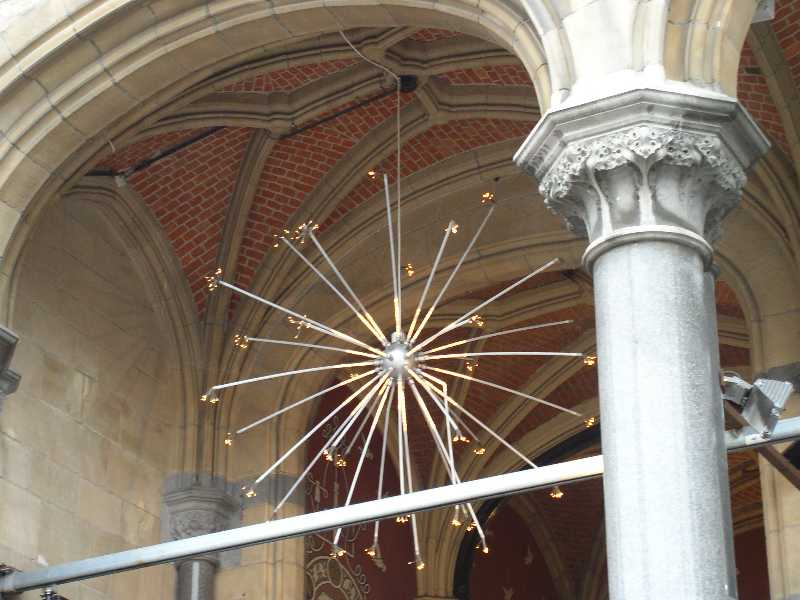


Prediction: Fire  Actual: Neutral


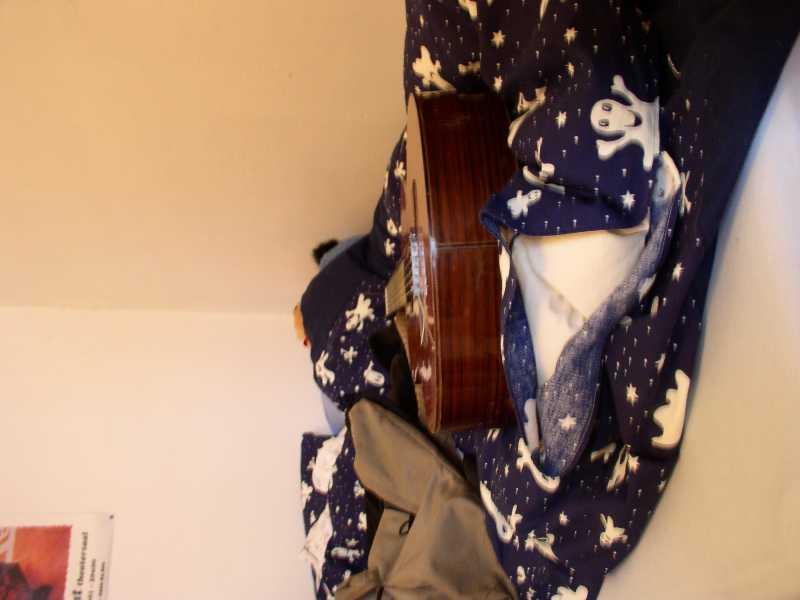


Prediction: Fire  Actual: Neutral


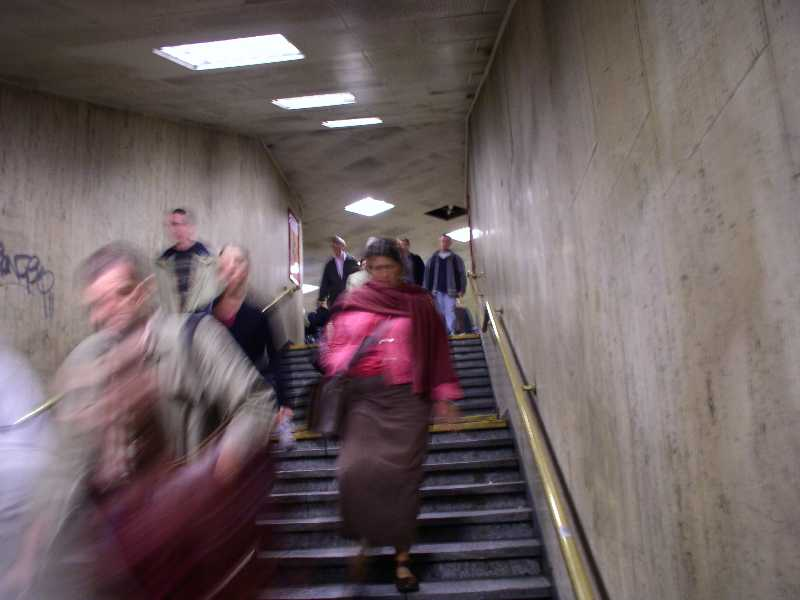

Correct Prediction
prediction: Fire


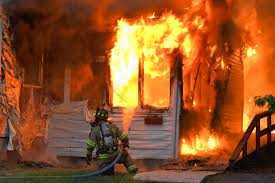

Correct Prediction
prediction: Fire


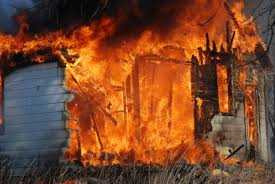


Prediction: Neutral  Actual: Fire


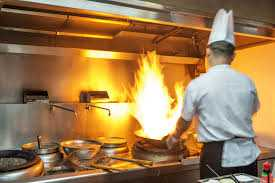


Prediction: Neutral  Actual: Fire


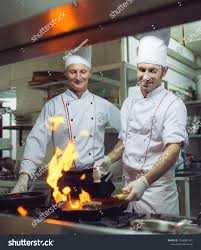

100%|██████████| 187/187 [00:00<00:00, 3484.65it/s]


,FrameFileName,ActualClass,PredictedClass,Max_Probability,Is_correct_prediction
0,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Neutral,Neutral,1.0,True
1,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Neutral,Neutral,1.0,True
2,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Neutral,Neutral,1.0,True
3,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Neutral,Neutral,1.0,True
4,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Neutral,Neutral,1.0,True
...,...,...,...,...,...
182,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Fire,Fire,1.0,True
183,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Fire,Fire,1.0,True
184,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Fire,Fire,1.0,True
185,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Fire,Fire,1.0,True


In [122]:
# print a couple of correct predictions and a couple of incorrect predictions
count_correct_pred_fire=2
count_correct_pred_neutral=2
count_incorrect_pred_fire=2
count_incorrect_pred_neutral=2

from IPython.display import display, Image
#display(Image(filename='MyImage.png'))

print('Below sample Images for Correct Predictaion')
for i in tqdm(range(EvalFinalOutput.shape[0])):
    # loading the image and keeping the target size as (224,224,3)
    # three-dimensional array containing the red, green, and blue pixel intensities. 
    #Image has been reformated to be 224-by-224 pixels in size.
    if count_correct_pred_fire > 0 and EvalFinalOutput['Is_correct_prediction'][i] and EvalFinalOutput['ActualClass'][i] =='Fire':
      print('Correct Prediction')
      print('prediction:',EvalFinalOutput['PredictedClass'][i])
      display(Image(EvalFinalOutput['FrameFileName'][i]))
      count_correct_pred_fire-=1
    elif count_correct_pred_neutral > 0 and EvalFinalOutput['Is_correct_prediction'][i] and EvalFinalOutput['ActualClass'][i] =='Neutral':
      print('Correct Prediction')
      print('prediction:',EvalFinalOutput['PredictedClass'][i])
      display(Image(EvalFinalOutput['FrameFileName'][i]))
      count_correct_pred_neutral-=1
    elif count_incorrect_pred_fire > 0 and not EvalFinalOutput['Is_correct_prediction'][i] and EvalFinalOutput['ActualClass'][i] =='Fire':
      print('')
      print('Prediction:',EvalFinalOutput['PredictedClass'][i],' Actual:',EvalFinalOutput['ActualClass'][i])
      display(Image(EvalFinalOutput['FrameFileName'][i]))
      count_incorrect_pred_fire-=1
    elif count_incorrect_pred_neutral > 0 and not EvalFinalOutput['Is_correct_prediction'][i] and EvalFinalOutput['ActualClass'][i] =='Neutral':
      print('')
      print('Prediction:',EvalFinalOutput['PredictedClass'][i],' Actual:',EvalFinalOutput['ActualClass'][i])
      display(Image(EvalFinalOutput['FrameFileName'][i]))
      count_incorrect_pred_neutral-=1
    else:
      continue

EvalFinalOutput

## Confusion Matrix

In [123]:
from sklearn.metrics import confusion_matrix

actualValue = EvalFinalOutput['ActualClass']
predictedValue = EvalFinalOutput['PredictedClass']

cmt = confusion_matrix(actualValue, predictedValue)
print(cmt)

[[91  6]
 [11 79]]


In [124]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Convert  nominal variable to numeric for calculating recall , precision , fp , tp , auc etc
EvalFinalOutput['ActualClass'] = EvalFinalOutput['ActualClass'].map({"Fire":1, "Neutral":0})
EvalFinalOutput['PredictedClass'] = EvalFinalOutput['PredictedClass'].map({"Fire":1, "Neutral":0})


EvalFinalOutput


,FrameFileName,ActualClass,PredictedClass,Max_Probability,Is_correct_prediction
0,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,0,0,1.0,True
1,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,0,0,1.0,True
2,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,0,0,1.0,True
3,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,0,0,1.0,True
4,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,0,0,1.0,True
...,...,...,...,...,...
182,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,1,1,1.0,True
183,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,1,1,1.0,True
184,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,1,1,1.0,True
185,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,1,1,1.0,True


In [125]:
# Convert Dataframe
# column to list using list() function in Python
# actual values
actual = list(EvalFinalOutput["ActualClass"])
# predicted values
predicted = list(EvalFinalOutput["PredictedClass"])

## Classification Report

In [126]:
# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[91  6]
 [11 79]]
Outcome values : 
 91 6 11 79
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.94      0.91        97
           0       0.93      0.88      0.90        90

    accuracy                           0.91       187
   macro avg       0.91      0.91      0.91       187
weighted avg       0.91      0.91      0.91       187



In [127]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
Model_accuracy = {}

## ROC AUC curve for measuring Accuracy

In [128]:
def plot_roc_curve(model, yTest, yPred):
    fpr, tpr, thresholds = roc_curve(yTest, yPred)
    roc_auc = auc(fpr, tpr)
    lw = 2
    #print('AUC area:', roc_auc)
    Model_accuracy[model] = roc_auc_score(yTest,yPred)
    print('AUC roc_auc_score:', roc_auc_score(yTest,yPred))
    plt.plot([0,1],[0,1],'k--')
    #plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title(model)
    plt.show()

AUC roc_auc_score: 0.9079610538373425


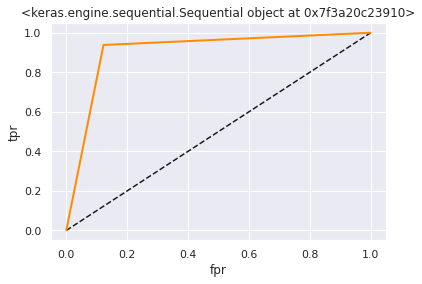

In [129]:
plot_roc_curve(model,actual,  predicted)

## Write predicted class onto the test images
Print class on test image and store in 'gDrive/Fire_ImageDataSet/OutputFiles/VGG_Predicted_Images'

In [130]:
import os , os.path
import cv2 

In [131]:
EvalFinalOutput  = pd.read_csv(OutputFiles+"/EvalFinalVGGOutput.csv")

In [132]:
EvalFinalOutput.head()

,FrameFileName,ActualClass,PredictedClass,Max_Probability,Is_correct_prediction
0,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Neutral,Neutral,1.0,True
1,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Neutral,Neutral,1.0,True
2,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Neutral,Neutral,1.0,True
3,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Neutral,Neutral,1.0,True
4,/content/gdrive/MyDrive/Fire_ImageDataSet//Out...,Neutral,Neutral,1.0,True


In [133]:
# test getting file folder name
VGG_Predicted_folder = OutputFiles+'/VGG_Predicted_Images'
fileExt   = '.jpg'
x= EvalFinalOutput['FrameFileName'][0]
print(x)

/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_4.jpg


In [134]:
# extract file name only
baseFileName = os.path.basename(x)
print(baseFileName)

TN_image_4.jpg


In [135]:
# build final path and check
FinalPath= os.path.join(VGG_Predicted_folder,baseFileName)
print(FinalPath)

/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_4.jpg


**cv2.putText() method is used to draw a text string on any image.**

Syntax: cv2.putText(image, text, org, font, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])

Parameters: image: It is the image on which text is to be drawn. text: Text string to be drawn. org: It is the coordinates of the bottom-left corner of the text string in the image. The coordinates are represented as tuples of two values i.e. (X coordinate value, Y coordinate value). font: It denotes the font type. Some of font types are FONT_HERSHEY_SIMPLEX, FONT_HERSHEY_PLAIN, , etc. fontScale: Font scale factor that is multiplied by the font-specific base size. color: It is the color of text string to be drawn. For BGR, we pass a tuple. eg: (255, 0, 0) for blue color. thickness: It is the thickness of the line in px. lineType: This is an optional parameter.It gives the type of the line to be used. bottomLeftOrigin: This is an optional parameter. When it is true, the image data origin is at the bottom-left corner. Otherwise, it is at the top-left corner.

Return Value: It returns an image which has the word "Fire" or "Neutral" written on it to indicate the prediction from the model.

In [136]:
# for loop to read and store frames
## some issue with writing to the output folder hence trying writing in my gdrive
VGG_Predicted_folder = OutputFiles+'/VGG_Predicted_Images'
if not os.path.exists(VGG_Predicted_folder):
   os.makedirs(VGG_Predicted_folder) 

for i in tqdm(range(EvalFinalOutput.shape[0])):
    # loading the image and keeping the target size as (224,224,3)
    # three-dimensional array containing the red, green, and blue pixel intensities. 
    #Image has been reformated to be 224-by-224 pixels in size.
    img1 = cv2.imread(EvalFinalOutput['FrameFileName'][i])
    print(EvalFinalOutput['FrameFileName'][i])
    # Overlaying Class Name Text Ontop of the Frame
    cv2.putText(img1, EvalFinalOutput['PredictedClass'][i], (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    # Saving the image
    x= EvalFinalOutput['FrameFileName'][i]
    #print(x)
    baseFileName = os.path.basename(x)
    #print(baseFileName)
    FinalPath= os.path.join(VGG_Predicted_folder,baseFileName)
    print(FinalPath)
    if not cv2.imwrite(FinalPath, img1, [cv2.IMWRITE_JPEG_QUALITY, 50]):
     print("Could not write image")
    

  3%|▎         | 6/187 [00:00<00:03, 52.49it/s]

/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_4.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_4.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_40.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_40.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_39.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_39.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_99.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_99.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_62.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_62.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDat

 10%|▉         | 18/187 [00:00<00:03, 48.73it/s]

/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_54.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_54.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_93.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_93.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_48.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_48.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_57.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_57.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_45.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_45.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseD

 16%|█▌        | 30/187 [00:00<00:03, 51.28it/s]

/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_58.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_58.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_78.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_78.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_84.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_84.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_64.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_64.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_65.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_65.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseD

 19%|█▉        | 36/187 [00:00<00:03, 47.91it/s]

/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_80.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_80.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_97.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_97.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_71.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_71.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_98.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_98.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_27.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_27.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseD

 22%|██▏       | 41/187 [00:00<00:03, 47.96it/s]

/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_44.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_44.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_85.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_85.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_94.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_94.jpg


 25%|██▍       | 46/187 [00:00<00:02, 47.87it/s]

/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_76.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_76.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_95.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_95.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_37.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_37.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_60.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_60.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_61.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_61.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseD

 27%|██▋       | 51/187 [00:01<00:03, 45.11it/s]

/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_72.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_72.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_73.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_73.jpg


 30%|██▉       | 56/187 [00:01<00:02, 45.02it/s]

/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_5.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_5.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_6.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_6.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_30.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_30.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_26.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_26.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_3.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_3.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet

 35%|███▌      | 66/187 [00:01<00:02, 44.95it/s]

/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_22.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_22.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_23.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_23.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_29.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_29.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_12.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_12.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_43.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_43.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseD

 38%|███▊      | 71/187 [00:01<00:02, 42.76it/s]

/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_0.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_0.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_24.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_24.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_16.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_16.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_53.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_53.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_10.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_10.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDat

 41%|████      | 76/187 [00:01<00:02, 43.41it/s]

/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_42.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_42.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_11.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_11.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_35.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_35.jpg


 43%|████▎     | 81/187 [00:01<00:02, 42.23it/s]

/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_49.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_49.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_32.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_32.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_13.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_13.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_51.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_51.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_46.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_46.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseD

 46%|████▌     | 86/187 [00:01<00:02, 44.23it/s]

/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_18.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_18.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_28.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_28.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_2.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_2.jpg


 49%|████▊     | 91/187 [00:01<00:02, 43.94it/s]

/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Neutral/TN_image_34.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TN_image_34.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_42.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_42.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_10.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_10.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_66.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_66.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_24.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_24.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/

 55%|█████▌    | 103/187 [00:02<00:01, 64.12it/s]

/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_88.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_88.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_76.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_76.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_89.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_89.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_44.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_44.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_93.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_93.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fir

 61%|██████    | 114/187 [00:02<00:00, 76.45it/s]

/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_38.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_38.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_61.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_61.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_91.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_91.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_81.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_81.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_29.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_29.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fir

 68%|██████▊   | 128/187 [00:02<00:00, 88.39it/s]

/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_20.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_20.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_22.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_22.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_71.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_71.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_18.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_18.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_45.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_45.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fir

 75%|███████▌  | 141/187 [00:02<00:00, 99.78it/s]

/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_36.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_36.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_28.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_28.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_34.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_34.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_84.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_84.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_83.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_83.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fir

 81%|████████▏ | 152/187 [00:02<00:00, 102.37it/s]

/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_30.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_30.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_25.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_25.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_73.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_73.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_48.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_48.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_54.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_54.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fir

 88%|████████▊ | 165/187 [00:02<00:00, 105.57it/s]

/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_55.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_55.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_78.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_78.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_68.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_68.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_6.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_6.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_3.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_3.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF

 96%|█████████▌| 179/187 [00:02<00:00, 114.66it/s]

/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_90.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_90.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_2.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_2.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_87.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_87.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_7.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_7.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_8.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_8.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_i

100%|██████████| 187/187 [00:02<00:00, 66.41it/s] 

/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_27.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_27.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_63.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_63.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_11.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_11.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/BaseDataSet/Test/Fire/TF_image_1.jpg
/content/gdrive/MyDrive/Fire_ImageDataSet//OutputFiles/VGG_Predicted_Images/TF_image_1.jpg
